In [1]:
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
# from keras.utils import np_utils
import pandas as pd
from keras.utils import to_categorical

def data_spli_to_fit(data):

    data[47] = data[47].fillna('Normal')
    data[47] = data[47].replace(' Fuzzers','Fuzzers')
    data[47] = data[47].replace(' Fuzzers ','Fuzzers')
    data[47] = data[47].replace(' Reconnaissance','Reconnaissance')
    data[47] = data[47].replace(' Reconnaissance ','Reconnaissance')
    data[47] = data[47].replace(' Shellcode','Shellcode')
    data[47] = data[47].replace(' Shellcode ','Shellcode')
    data[47] = data[47].replace('Backdoors','Backdoor')
    data = data.fillna(0)
    data[39] = data[39].replace(' ',0)
    data[39] = data[39].astype('int64')
    data_2_type = data[4].unique().tolist() 
    data_3_type = data[5].unique().tolist() 
    data_4_type = data[13].unique().tolist() 
    data = data.drop([48], axis=1) 
    
    
    #::Convert the following data into the integer labels::
    
    data[4]= data[4].apply(lambda x : data_2_type.index(x))
    data[5] = data[5].apply(lambda x : data_3_type.index(x))
    data[13] = data[13].apply(lambda x : data_4_type.index(x))
    
    
    unlabled_data = data.drop([47],axis=1)
    return(unlabled_data, pd.DataFrame(data[47]))

def data_select(data, nums=100):
    data_43_type = data[47].unique().tolist()
    print(data_43_type) 
    print(data[47].value_counts())
    data[47] = data[47].apply(lambda x : data_43_type.index(x))
    r_data = DataFrame()
        
    for x in range(10):
        tp = data[data[47] == x]
        tp = shuffle(tp)
        tp = tp.iloc[1:nums+1]
        r_data = pd.concat([r_data, tp], ignore_index=True)
    data = shuffle(r_data)
    unlabeled_data  = data.drop([47],axis=1)
    res = np_utils.to_categorical(data[47], num_classes=10)
    return (unlabeled_data, res, data_43_type)

def data_s(data, sp_num):
    data_43_type = data[47].unique().tolist()
    print(data_43_type) 
    print(data[47].value_counts())
    data[47] = data[47].apply(lambda x : data_43_type.index(x))
    train_data = DataFrame()
    test_data = DataFrame()
    for x in range(0,len(sp_num)):
        tp = data[data[47] == x]
        train_data = pd.concat([train_data, tp.iloc[1:sp_num[x]+1]], ignore_index=True)
        test_data = pd.concat([test_data, tp.iloc[sp_num[x]+1:-1]], ignore_index=True) 
    train_data = shuffle(train_data)
    test_data = shuffle(test_data)
    ub_train = train_data.drop([47],axis=1)
    ub_test = test_data.drop([47],axis=1)
    train_res = to_categorical(train_data[47], num_classes=10)
    test_res = to_categorical(test_data[47], num_classes=10)
    return(train_data, train_res, test_data, test_res, data_43_type)

2024-03-05 16:21:57.717047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 16:21:57.717170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 16:21:57.891383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Importing all the data and concate it**

In [2]:
data = pd.concat([pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv', header=None), \
    pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv', header=None), \
        pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_3.csv', header=None), \
            pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_4.csv', header=None)], ignore_index=True)

/tmp/ipykernel_33/583105953.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat([pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv', header=None), \
/tmp/ipykernel_33/583105953.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv', header=None), \


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [3]:
(data,res) =  data_spli_to_fit(data)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))
data = pd.concat([data, res],axis=1)
#data.info()

#This line appears to split the data into training and testing sets based on the specified numbers in sp_num

sp_num = [1370880,23275,7608,8281,131435,811,13712,87,1371,1440]
(train_data, train_res, test_data, test_res, data_43_type) = data_s(data,sp_num)
#p.info()

['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis']
47
Normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add
from tensorflow.keras import Sequential

model = Sequential()
model.add(Reshape((-1,1), input_shape=(44,)))
model.add(Conv1D(32, 3, activation='relu', padding='causal'))
model.add(Conv1D(64, 3, activation='relu', padding='causal'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(70,recurrent_dropout=0.1))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 44, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 44, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 44, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 70)             │        37,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,846 (175.18 KB)

 Trainable params: 44,846 (175.18 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])



In [10]:
model.fit(train_data, train_res, epochs=10, batch_size=2048)

Epoch 1/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 225s 292ms/step - accuracy: 0.9819 - loss: 0.0116
Epoch 2/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 257s 286ms/step - accuracy: 0.9973 - loss: 0.0022
Epoch 3/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 213s 280ms/step - accuracy: 0.9976 - loss: 0.0014
Epoch 4/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 262s 281ms/step - accuracy: 0.9979 - loss: 0.0011
Epoch 5/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 214s 281ms/step - accuracy: 0.9983 - loss: 9.3382e-04
Epoch 6/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 215s 282ms/step - accuracy: 0.9985 - loss: 7.9251e-04
Epoch 7/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 259s 278ms/step - accuracy: 0.9986 - loss: 7.1122e-04
Epoch 8/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 261s 277ms/step - accuracy: 0.9988 - loss: 6.8596e-04
Epoch 9/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 213s 279ms/step - accuracy: 0.9989 - loss: 6.2960e-04
Epoch 10/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 213s 280ms/step - accuracy: 0.9989 - loss: 6.0762e-04


480/480 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step


/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


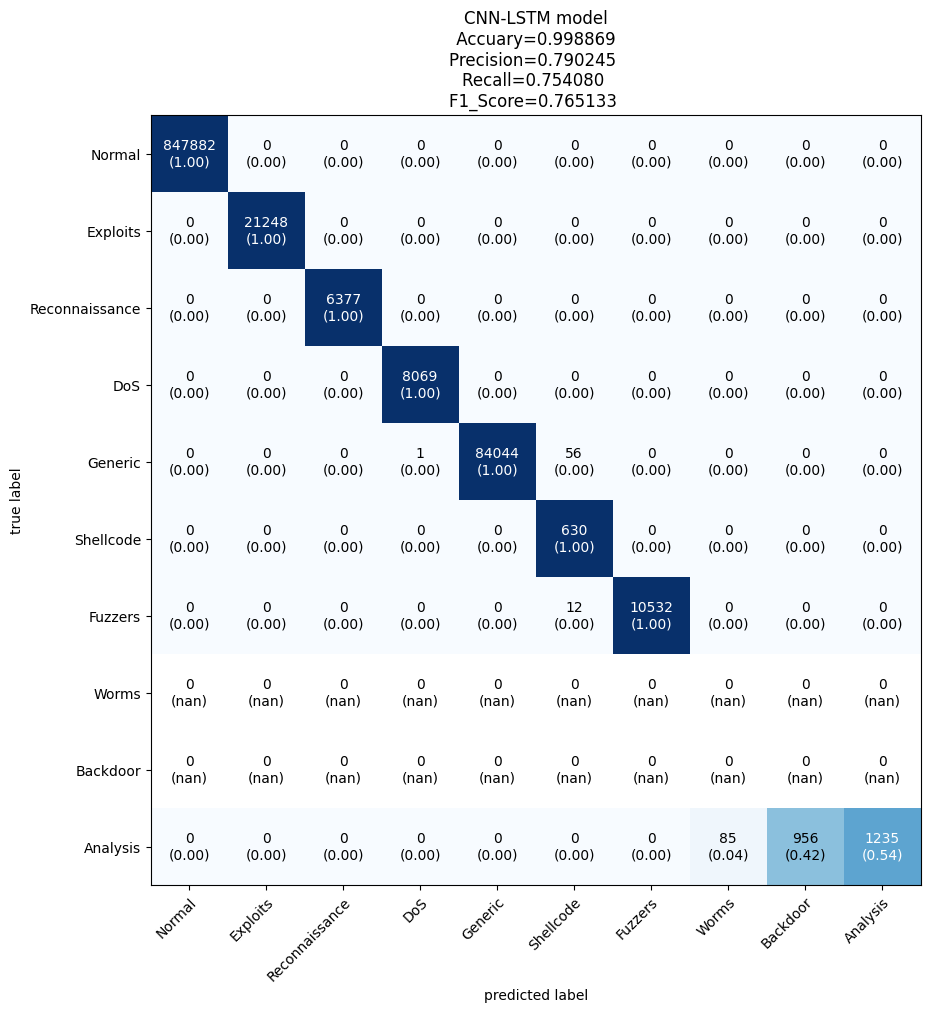

In [11]:
#model.evaluate(test_data,test_res)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

res = model.predict(test_data, batch_size=2048)
def confusion_plot(roi,res,title=None, class_name=None):
    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(roi,res), class_names = class_name, show_absolute=True, show_normed=True, hide_spines=False, hide_ticks=False, figsize=(10,10))
    plt.title(title+'\n Accuary=%f \nPrecision=%f \nRecall=%f \nF1_Score=%f '%(\
    accuracy_score(roi,res),\
    precision_score(roi,res, average='macro'),\
    recall_score(roi,res, average='macro'),\
    f1_score(roi,res, average='macro')\
))
    plt.show()
confusion_plot(res.argmax(axis=-1), test_res.argmax(axis=-1), 'CNN-LSTM model', data_43_type)